In [32]:
!pip install geopandas

import geopandas
import matplotlib.pyplot as plt

In [33]:
with open("/content/drive/My Drive/Source Data/Neighborhood Councils (Certified).geojson", "r") as read_file:
    nc_list = geopandas.read_file(read_file)

In [34]:

# projecting to california zone 5 map before getting the center and converting back to WGS 84
nc_list['centroid'] = nc_list.geometry.to_crs('EPSG:26945').centroid.to_crs('EPSG:4326')
nc_list['shortname'] = nc_list['name'].apply(lambda x: x.replace(' NC', '').replace('NC ', '').replace(' NDC', '').replace(' CC', '').title())
nc_list

,name,waddress,certified,objectid,service_re,nc_id,dwebsite,geometry,centroid,shortname
0,LINCOLN HEIGHTS NC,http://www.lincolnheightsnc.org/,2002-04-27T00:00:00,1,REGION 8 - NORTH EAST LA,47,http://empowerla.org/LHNC,"MULTIPOLYGON (((-118.20503 34.05558, -118.2060...",POINT (-118.21158 34.07091),Lincoln Heights
1,VOICES OF 90037,https://www.voicesnc.org,2008-06-16T00:00:00,2,REGION 9 - SOUTH LA 2,109,https://empowerla.org/voicesof90037/,"MULTIPOLYGON (((-118.28273 34.01114, -118.2823...",POINT (-118.29035 33.99671),Voices Of 90037
2,LOS FELIZ NC,http://www.losfeliznc.org/,2002-06-11T00:00:00,3,REGION 7 - EAST,36,http://empowerla.org/LFNC,"MULTIPOLYGON (((-118.30027 34.15793, -118.2988...",POINT (-118.29376 34.12783),Los Feliz
3,MISSION HILLS NC,http://mhnconline.org/,2005-04-19T00:00:00,4,REGION 1 - NORTH EAST VALLEY,101,http://empowerla.org/MHNC,"MULTIPOLYGON (((-118.46933 34.28050, -118.4693...",POINT (-118.45796 34.26736),Mission Hills
4,GREATER TOLUCA LAKE NC,http://www.gtlnc.org/,2002-09-10T00:00:00,5,REGION 4 - SOUTH EAST VALLEY,28,http://empowerla.org/GTLNC,"MULTIPOLYGON (((-118.35520 34.16491, -118.3552...",POINT (-118.35965 34.15260),Greater Toluca Lake
...,...,...,...,...,...,...,...,...,...,...
94,SOUTH ROBERTSON NC,http://www.soronc.org/,2002-08-13T00:00:00,91,REGION 11 - WEST LA,61,http://empowerla.org/SORONC,"MULTIPOLYGON (((-118.38235 34.06294, -118.3814...",POINT (-118.39011 34.04491),South Robertson
95,ECHO PARK NC,http://gepenc.org/,2002-04-16T00:00:00,100,REGION 7 - EAST,44,http://empowerla.org/GEPENC,"MULTIPOLYGON (((-118.25030 34.10150, -118.2499...",POINT (-118.25137 34.07866),Echo Park
96,HOLLYWOOD UNITED NC,http://www.hollywoodunitednc.org/,2002-10-15T00:00:00,101,REGION 5 - CENTRAL 1,30,http://empowerla.org/HUNC,"MULTIPOLYGON (((-118.30666 34.11669, -118.3066...",POINT (-118.31915 34.11904),Hollywood United
97,HERMON NC,https:/www./hermonnc.org/,2017-05-25T00:00:00,102,REGION 8 - NORTH EAST LA,126,http://empowerla.org/hnc/,"MULTIPOLYGON (((-118.17592 34.11236, -118.1760...",POINT (-118.18395 34.10502),Hermon


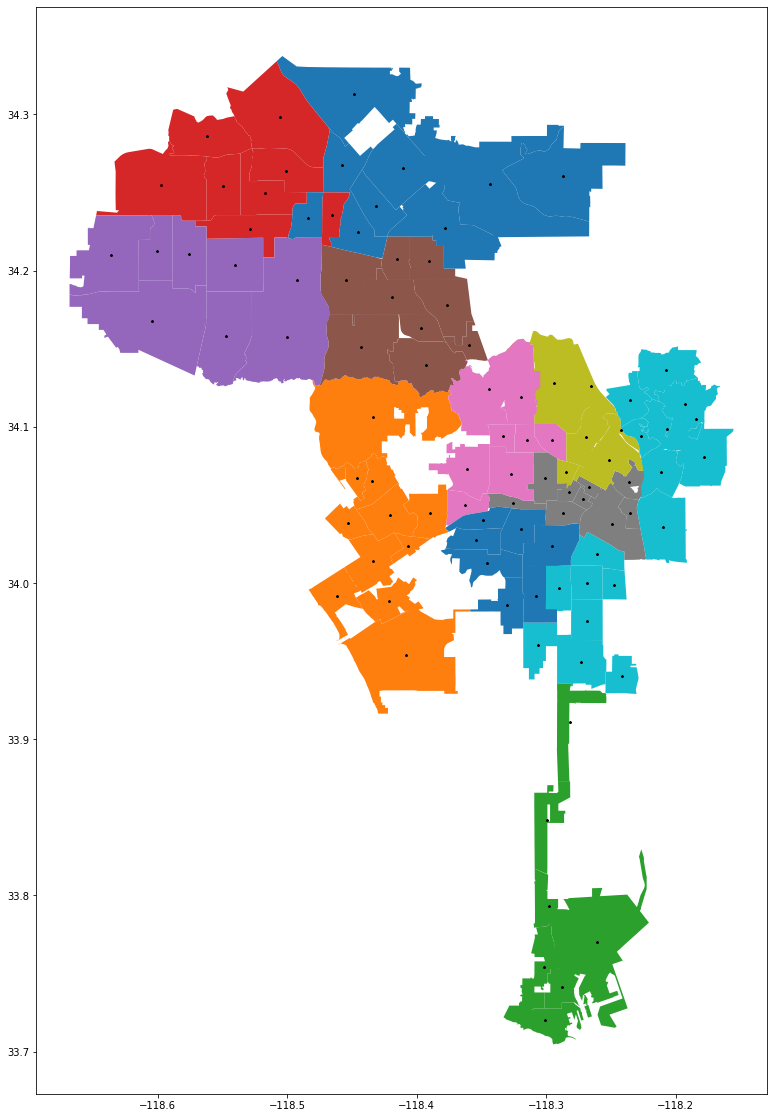

In [35]:
combined_map = nc_list.plot(column='service_re', figsize=(40,20))
nc_list['centroid'].plot(ax=combined_map, color='black', marker="*", markersize=5)
plt.show()

Following code exports NC IDs as CSV file and JSON file 

In [36]:
# fix some NC IDs
#nc_list.iat[0, 5] = 127
#nc_list.iat[1, 5] = 128
# export a CSV with the centroids
with open("/content/drive/My Drive/Source Data/nc_data.csv", "w") as write_file:
    nc_list.drop(columns=['geometry']).to_csv(write_file)

In [37]:
# fix some NC IDs
nc_list.iat[0, 5] = 127
nc_list.iat[1, 5] = 128
# export a CSV with the centroids
with open("/content/drive/My Drive/Source Data/nc_data.json", "w") as write_file:
    nc_list[['nc_id', 'centroid']].to_json(write_file, orient='records', lines=True, default_handler=str)